<a href="https://colab.research.google.com/github/zoya-ivanova/-Data-Science/blob/main/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сравнение работы алгоритмов деревьев решений.

Использование ансамблевых алгоритмов.

Анализ рынка недвижимости Калифорнии с использованием ансамблевых методов
используя набор данных fetch_california_housing для построения и анализа моделей машинного обучения с акцентом на ансамблевые методы.



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from sklearn.metrics import r2_score
import graphviz

In [28]:
# Извлечем набор данных о жилье в Калифорнии в виде фрейма данных pandas
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
# Вывод размера выборки
df.shape

(20640, 9)

20640 строк,
9 столбцов:
*   MedInc (Средний доход домохозяйства в блоке)
*   HouseAge (Средний возраст домов в блоке)
*   AveRooms (Среднее количество комнат в доме)
*   AveBedrms (Среднее количество спален в доме)
*   Population (Население блока)
*   AveOccup (Среднее количество людей, проживающих в доме)
*   Latitude (Широта)
*   Longitude (Долгота)
*   MedHouseVal (Средняя стоимость дома в блоке)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [15]:
# Проверка на пропущенные значения
print("\nПропущенные значения:\n", df.isnull().sum())


Пропущенные значения:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [16]:
# Статистический анализ числовых переменных
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.87,1.90,0.50,2.56,3.53,4.74,15.00
HouseAge,20640.0,28.64,12.59,1.00,18.00,29.00,37.00,52.00
AveRooms,20640.0,5.43,2.47,0.85,4.44,5.23,6.05,141.91
AveBedrms,20640.0,1.10,0.47,0.33,1.01,1.05,1.10,34.07
Population,20640.0,1425.48,1132.46,3.00,787.00,1166.00,1725.00,35682.00
AveOccup,20640.0,3.07,10.39,0.69,2.43,2.82,3.28,1243.33
Latitude,20640.0,35.63,2.14,32.54,33.93,34.26,37.71,41.95
Longitude,20640.0,-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31
MedHouseVal,20640.0,2.07,1.15,0.15,1.20,1.80,2.65,5.00


Данные показывают большое разнообразие в характеристиках районов Калифорнии, с большим разбросом в доходах, возрасте домов, размерах домов и населении. Некоторые значения (например, максимальное количество комнат и жильцов на дом) кажутся выбросами и требуют дополнительного изучения. Данные охватывают большую часть территории Калифорнии, как по широте, так и по долготе. Цены на жилье в Калифорнии варьируются в широком диапазоне, с большим количеством относительно недорогих домов и меньшим количеством очень дорогих домов.

<Axes: xlabel='MedHouseVal', ylabel='Density'>

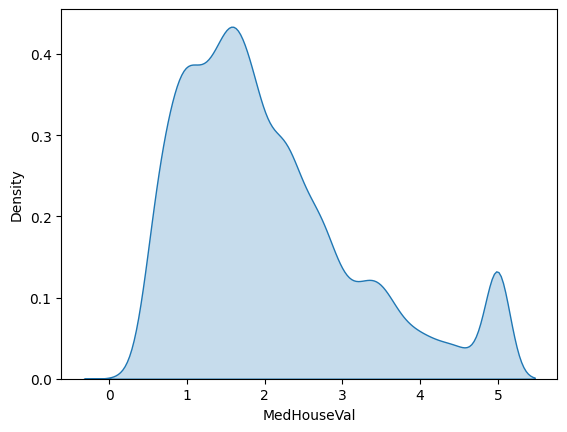

In [17]:
# Cоздадим график плотности ядра, который визуализирует распределение средней стоимости дома
sns.kdeplot(df['MedHouseVal'], fill=True)

<Axes: xlabel='MedHouseVal'>

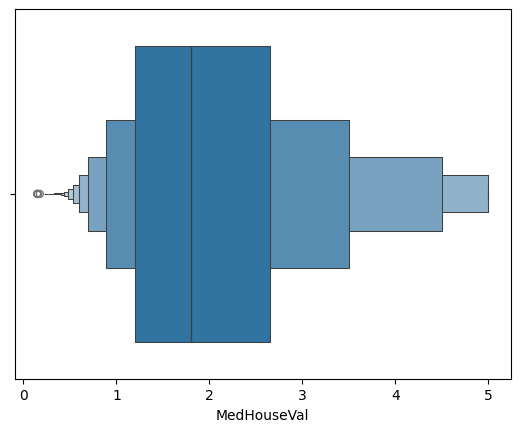

In [18]:
sns.boxenplot(x = df['MedHouseVal'])

In [9]:
df['MedHouseVal'].describe().round(2)

,MedHouseVal
count,20640.00
mean,2.07
std,1.15
min,0.15
25%,1.20
50%,1.80
75%,2.65
max,5.00


Средняя стоимость дома (MedHouseVal) равна 2.07

Данные распределены достаточно широко, стандартное отклонение - 1.15

Минимальная стоимость дома - 0.15, максимальная - 5.00.

In [29]:
# Разделение данных
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Построим модель регрессии дерева решений (DecisionTreeRegressor) и оценим ее производительность на тестовой выборке
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [31]:
r2_score(y_test, model.predict(X_test))

0.622075845135081

Коэффициент детерминации (R²) равен 0.62, модель объясняет примерно 62% изменения в целевой переменной (в данном случае, стоимость дома) на тестовой выборке.

Модель дерева решений неплохо предсказывает стоимость дома, но нужно учучшать

In [35]:
# Построим модель регрессии дерева решений и оценим ее производительность после масштабирования на тестовой выборке
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [36]:
r2_score(y_test, model.predict(X_test))

0.6230424613065773

Улучшение есть, но не существенное (0,622 -> 0,623)

In [37]:
r2_score(y_train, model.predict(X_train))

1.0

Высокий R² (1) на обучающей выборке говорит о том, что модель идеально предсказывает данные, на которых она обучилась.
Низкий R² (0.623) на тестовой выборке говорит о том, что модель плохо справляется с предсказаниями на новых данных, которые она не видела во время обучения.

Разница в значениях R² на обучающей выборке (1) и тестовой выборке (0.623) явно указывает на переобучение модели.

Модель слишком хорошо запоминает обучающие данные и не может обобщить свои знания на новые, невидимые данные. В результате модель дает хорошие результаты на обучающей выборке, но плохо справляется с предсказаниями на тестовой выборке.


In [39]:
# Проведем эксперименты с разными значениями гиперпараметров для модели регрессии дерева решений
depths = [3, 10, 20]
splits = [2, 5, 10]       # мин количество образцов, чтобы узел мог быть разделен на два дочерних узла. Если меньше, узел не будет разделен, и он станет листом (leaf node).
samples_leaf = [2, 3, 4]  # минимальное количество образцов, которые должны находиться в каждом листе (leaf node) дерева
for depth in depths:
    for split in splits:
      for leaf in samples_leaf:
        model = DecisionTreeRegressor(max_depth=depth, min_samples_split=split, min_samples_leaf=leaf, random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        print(f"Глубина дерева: {depth}, минимальное число образцов в узле: {split}, минимальное количество образцов {leaf} R^2: {r2}")

Глубина дерева: 3, минимальное число образцов в узле: 2, минимальное количество образцов 2 R^2: 0.5097629887358219
Глубина дерева: 3, минимальное число образцов в узле: 2, минимальное количество образцов 3 R^2: 0.5097629887358219
Глубина дерева: 3, минимальное число образцов в узле: 2, минимальное количество образцов 4 R^2: 0.5097629887358219
Глубина дерева: 3, минимальное число образцов в узле: 5, минимальное количество образцов 2 R^2: 0.5097629887358219
Глубина дерева: 3, минимальное число образцов в узле: 5, минимальное количество образцов 3 R^2: 0.5097629887358219
Глубина дерева: 3, минимальное число образцов в узле: 5, минимальное количество образцов 4 R^2: 0.5097629887358219
Глубина дерева: 3, минимальное число образцов в узле: 10, минимальное количество образцов 2 R^2: 0.5097629887358219
Глубина дерева: 3, минимальное число образцов в узле: 10, минимальное количество образцов 3 R^2: 0.5097629887358219
Глубина дерева: 3, минимальное число образцов в узле: 10, минимальное количест

R² увеличивается по мере роста глубины дерева, более глубокое дерево может создавать более сложные правила и улавливать более тонкие зависимости.

При чрезмерном увеличении глубины дерева (например, 20) R² может начать уменьшаться. Это означает, что модель переобучается. Она слишком хорошо подходит к обучающим данным, но плохо обобщается на новые данные.

Уменьшение минимального количества образцов в узле и листе обычно приводит к увеличению R², но это также увеличивает риск переобучения. Слишком маленькое значение может привести к тому, что дерево будет слишком сложным и переобучится.

Вывод: компромисс между глубиной дерева и переобучением, оптимальная глубина - 10, так как она дает хороший R² без значительного переобучения.

In [46]:
model2 = DecisionTreeRegressor(random_state=42, max_depth=10,
                              min_samples_split=10, min_samples_leaf=2)

# Обучение модели
model2.fit(X_train, y_train)

# Вычисление R^2 на тестовой выборке
r2_score_tree = r2_score(y_test, model2.predict(X_test))

print(f"R^2: {r2_score_tree}")

R^2: 0.6934958776249269


In [43]:
from sklearn.ensemble import RandomForestRegressor

# Создание и обучение ансамбля RandomForest
forest_model = RandomForestRegressor(n_estimators=200, random_state=42)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
forest_r2 = r2_score(y_test, forest_predictions)


In [47]:
# Сравнение результатов
print(f"R^2 для одиночного DecisionTreeRegressor: {r2_score_tree}")
print(f"R^2 для RandomForestRegressor: {forest_r2}")

print(f"Улучшение в R^2: {r2_score_tree - forest_r2}")

R^2 для одиночного DecisionTreeRegressor: 0.6934958776249269
R^2 для RandomForestRegressor: 0.8063074586513359
Улучшение в R^2: -0.11281158102640898


Модель случайного леса (RandomForestRegressor) работает значительно лучше, чем одиночное дерево решений:

R^2 для одиночного DecisionTreeRegressor: 0.69, модель способна объяснить около 69% дисперсии целевой переменной с помощью независимых переменных.

R^2 для RandomForestRegressor: 0.81, модель объясняет около 81% дисперсии целевой переменной.

Улучшение в R^2: -0.11281158102640898 является отрицательным, потому что мы вычисляем разницу между R^2 случайного леса и R^2 одиночного дерева. В данном случае, случайный лес улучшает результат на 11% по сравнению с одиночным деревом решений.

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

# Создание и обучение ансамбля GradientBoostingRegressor
boosting_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_predictions = boosting_model.predict(X_test)
boosting_r2 = r2_score(y_test, boosting_predictions)

# Сравнение результатов
print(f"R^2 для одиночного DecisionTreeRegressor: {r2_score_tree}")
print(f"R^2 для RandomForestRegressor: {forest_r2}")
print(f"R^2 для GradientBoostingRegressor: {boosting_r2}")
print(f"Улучшение в R^2: {r2_score_tree - boosting_r2}")
print(f"Улучшение в R^2: {forest_r2 - boosting_r2}")

R^2 для одиночного DecisionTreeRegressor: 0.6934958776249269
R^2 для RandomForestRegressor: 0.8063074586513359
R^2 для GradientBoostingRegressor: 0.8004443339747364
Улучшение в R^2: -0.10694845634980943
Улучшение в R^2: 0.0058631246765995515


RandomForestRegressor немного лучше, чем GradientBoostingRegressor, но разница не так уж велика

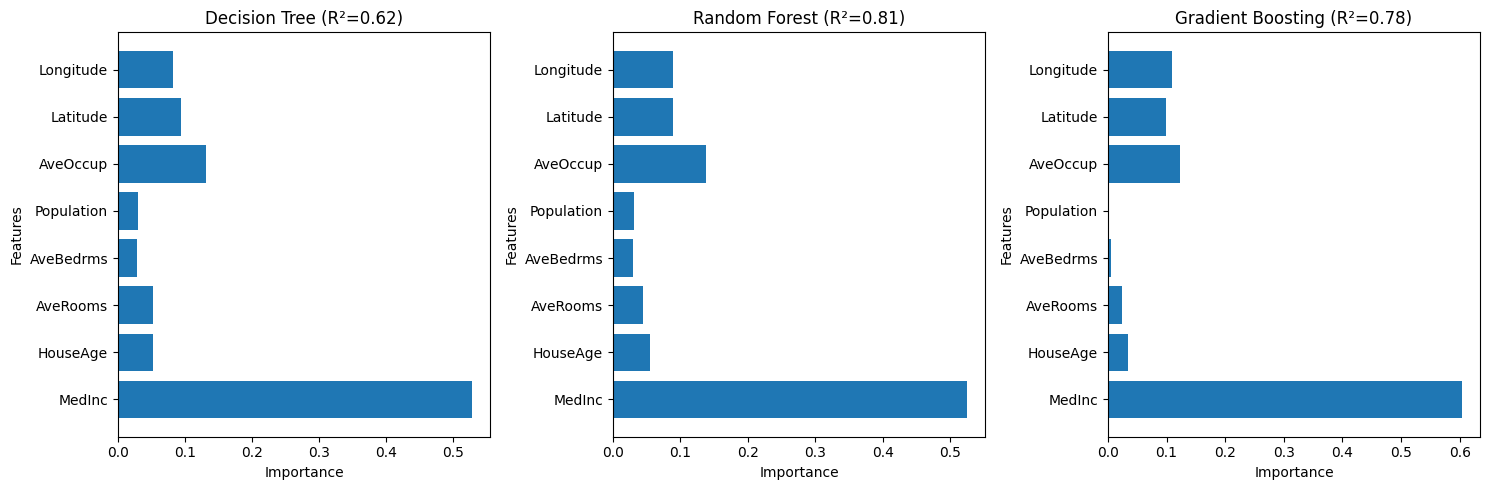

In [49]:
# Анализ важности признаков при использовании различных ансамблевых алгоритмов
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Обучение моделей и оценка важности признаков
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    score = r2_score(y_test, model.predict(X_test))
    feature_importances = model.feature_importances_

    ax.barh(np.arange(len(feature_importances)), feature_importances, align='center')
    ax.set_yticks(np.arange(len(X.columns)))
    ax.set_yticklabels(X.columns)
    ax.set_title(f'{name} (R²={score:.2f})')
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features')

plt.tight_layout()
plt.show()

Сравнение производительности моделей

Decision Tree R² = 0.62

Random Forest R² = 0.81

Gradient Boosting R² = 0.78

Модели Random Forest и Gradient Boosting работают значительно лучше, чем Decision Tree, так как у них более высокие значения R².

Random Forest - лучшая модель из представленных.

Анализ важности признаков:

MedInc (Median Income) во всех трех моделях признак имеет наивысший показатель важности. Средний (медианный) доход сильно коррелирует с целевой переменной, что делает его ключевым фактором для предсказаний.

HouseAge (Возраст дома): признак также имеет высокую важность, особенно в моделях Random Forest и Gradient Boosting. Возраст дома влияет на его стоимость и состояние, что делает его значимым для предсказаний.

AveRooms (Среднее количество комнат): признак имеет умеренную важность во всех моделях. Количество комнат может быть индикатором размера и стоимости жилья.